# Customer Service Request Analysis

## 1. Understand the dataset

Import all the required python libraries.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 1.1 Import the dataset

Load the service requests from the csv file into pandas dataframe using pandas read_csv 

In [52]:
service_req_df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\mohan\AppData\Local\Temp\ipykernel_6340\4022931698.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  service_req_df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")


### 1.2 Visualize the dataset

Print the dataframe to visualize the dataset

In [53]:
service_req_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


### 1.3 Print the columns of the DataFrame

Print all the columns in the dataframe using columns command.
It has 53 columns

In [54]:
service_req_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

### 1.4 Identify the shape of the dataset

In [55]:
service_req_df.shape

(364558, 53)

The shape of the dataframe shows that it has
- 364558 rows or data points
- 53 columns or variables

### 1.5 Identify the variables with null values

Check for null values in each columns of the dataframe

In [56]:
service_req_df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

Out of 53 columns, 35 columns have null values

## 2. Exploratory Data Analysis

### 2.1 Frequency plot

Frequency plot is drawn between the number of null values and each column of the dataframe
- Bar plot is used from pandas plot
- column names are in xlabel
- Number of null values are in ylabel

Text(0, 0.5, 'Number of null values')

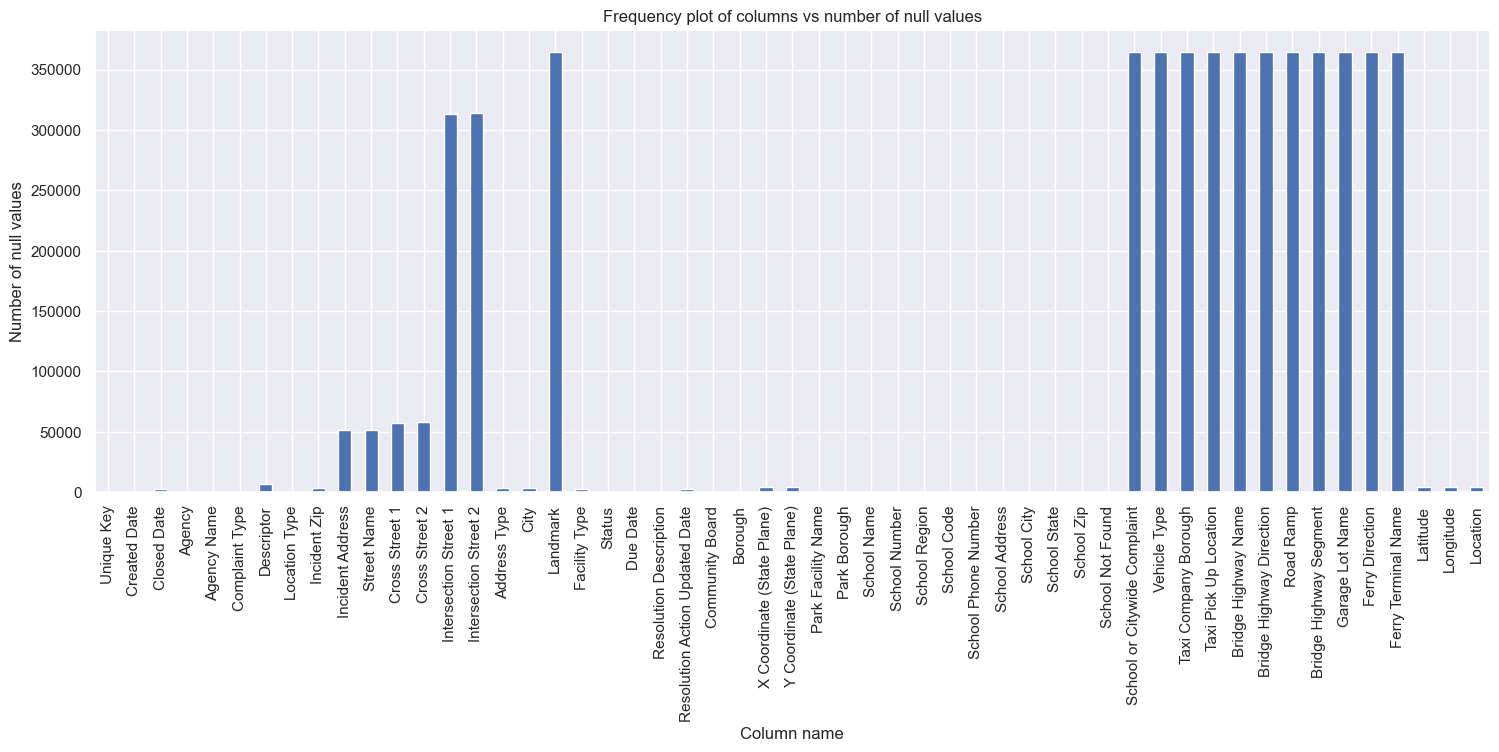

In [57]:
service_req_df.isnull().sum().plot(kind='bar', figsize=(18, 6))
plt.title('Frequency plot of columns vs number of null values')
plt.xlabel('Column name')
plt.ylabel('Number of null values')

### 2.2 Missing value treatment

Remove all the records whose closed date column is null.

In [58]:
service_req_df["Closed Date"].isnull().sum()

2381

In [59]:
service_req_df["Closed Date"].notnull().sum()

362177

- There are 2381 records with null Closed Date column
- 362177 records with dates in Closed Date column

In [60]:
# Take only the records with date in Closed Date column
service_req_df = service_req_df[service_req_df["Closed Date"].notnull()]
service_req_df.shape

(362177, 53)

In [61]:
service_req_df["Closed Date"].isnull().sum()

0

### 2.3 Analyze the Date columns

In [63]:
# convert the object closed date column into datetime 
service_req_df['Closed Date'] = pd.to_datetime(service_req_df['Closed Date'])

In [64]:
# convert the created date column into datetime format
service_req_df['Created Date'] = pd.to_datetime(service_req_df['Created Date'])

In [65]:
service_req_df['Closed Date']

0        2016-01-01 00:55:15
1        2016-01-01 01:26:57
2        2016-01-01 04:51:03
3        2016-01-01 07:43:13
4        2016-01-01 03:24:42
                 ...        
364553   2015-01-01 10:22:31
364554   2015-01-01 02:25:02
364555   2015-01-01 00:20:33
364556   2015-01-01 02:42:22
364557   2015-01-01 02:47:50
Name: Closed Date, Length: 362177, dtype: datetime64[ns]

- Calculate the difference between Closed date and created date
- Convert them into seconds using pandas total_seconds

**2.3.1 Time Elasped between closed and Created date**

In [66]:
service_req_df['Calculated diff_days'] = service_req_df['Closed Date'] - service_req_df['Created Date']

**2.3.2 Time Difference in Seconds**

In [67]:
service_req_df['Calculated diff'] = (service_req_df['Closed Date'] - service_req_df['Created Date']).dt.total_seconds()

In [68]:
service_req_df['Calculated diff']

0          3330.0
1          5233.0
2         17494.0
3         27927.0
4         12464.0
           ...   
364553    37067.0
364554     8434.0
364555     1143.0
364556     9653.0
364557    10020.0
Name: Calculated diff, Length: 362177, dtype: float64

**Check for any incorrect timeline**

Check whether the closed date is after the created date by checking the difference is not less than zero.

In [69]:
service_req_df[service_req_df['Calculated diff'] < 0]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Calculated diff_days,Calculated diff


There is no any incorrect timelines. All the records are closed after the creation

**2.3.3 Descriptive Analysis for Calculated diff column**

In [70]:
service_req_df['Calculated diff'].describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Calculated diff, dtype: float64

The descriptive analysis of difference column shows
- minimum value is 61
- maximum value is 2134342
- 75% of the distribution is within 18878

which shows that we have outliers and lets remove them after ploting box plot

**Boxplot for the calculated diff column**

<AxesSubplot: xlabel='Calculated diff'>

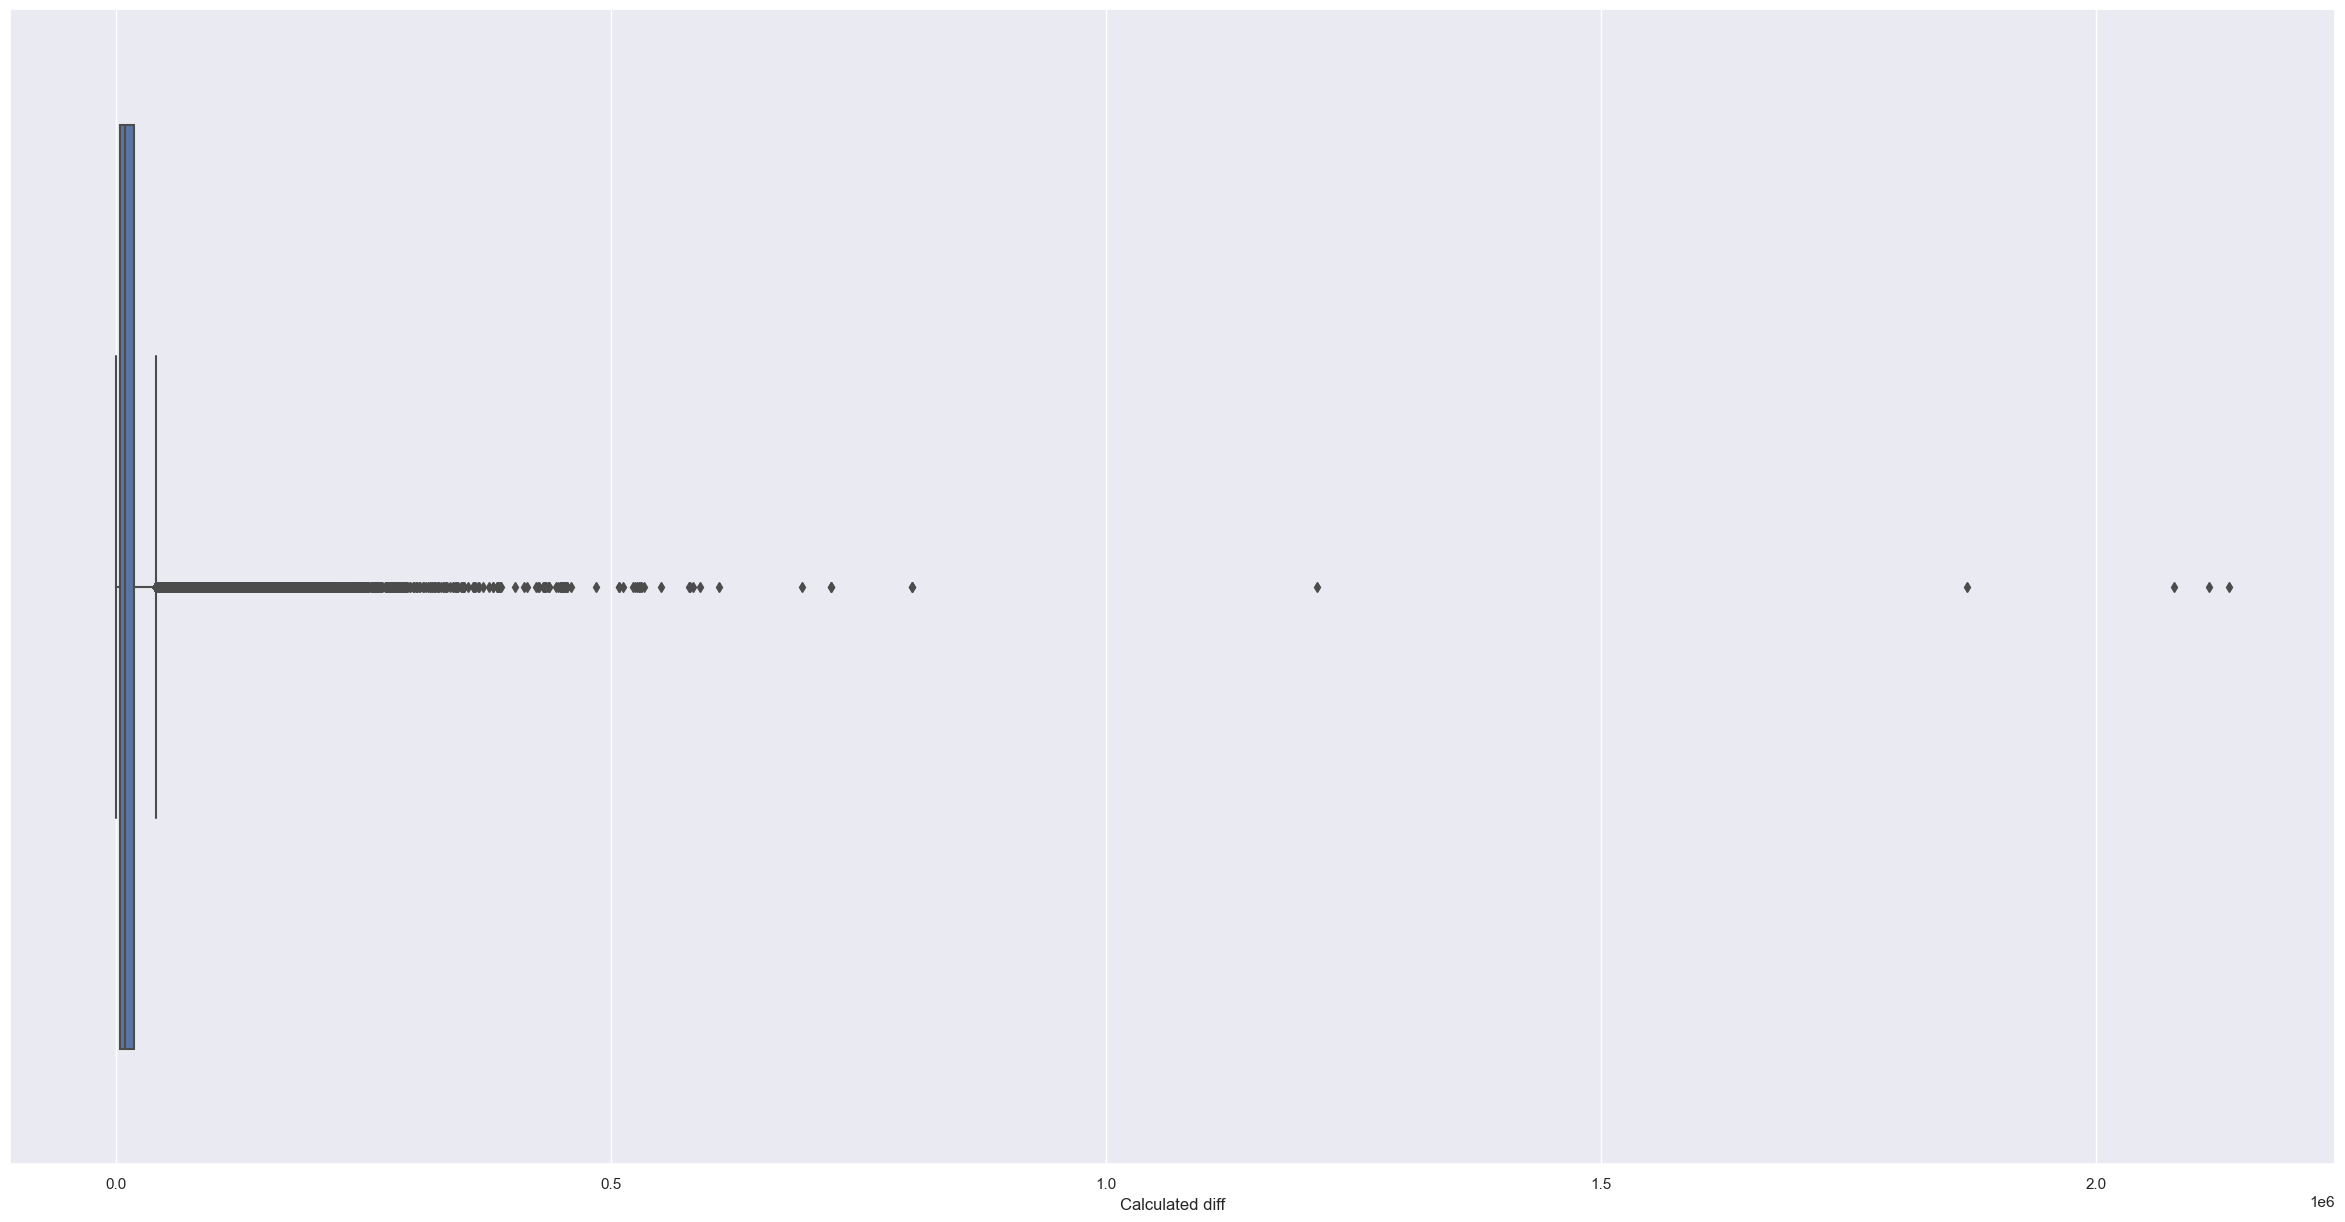

In [71]:
sns.set(rc={'figure.figsize':(30,15)})
sns.boxplot(x=service_req_df['Calculated diff'])

Lets remove the outlier using Interquartile method by calculating lower and upper range
- Find Q1 and Q3 
- Calculate the IQR
- Calculate lower_range and upper_range using the formula
- Remove all the records less than lower_range and greater than upper_range which are outliers

In [72]:
# function to calculate the lower and upper range
def outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col, [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [73]:
# lower and upper range for calculated difference column
lower_range, upper_range = outlier(service_req_df['Calculated diff'])
print(lower_range)
print(upper_range)

-16984.5
40395.5


Take all the records between lower and upper range which are not outliers

In [74]:
service_req_df = service_req_df[(service_req_df['Calculated diff'] > lower_range) & (service_req_df['Calculated diff'] < upper_range)]

In [75]:
service_req_df.shape

(339571, 55)

After removing the outliers, the number of rows in the dataset are 339571, initially it had 364558 rows

**2.3.4 Null values in Complaint Type and City Column**

In [77]:
print("Number of null values in Complaint type column:", service_req_df["Complaint Type"].isnull().sum())

Number of null values in Complaint type column: 0


In [76]:
print("Number of null values in City column:", service_req_df["City"].isnull().sum())

Number of null values in City column: 493


493 rows has missing values in the city column

**2.3.5 Impute NA with "Unknown City"**

Replace the NA value in the city column with "Unknown City"

In [130]:
service_req_df['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'SAINT ALBANS',
       'JAMAICA', 'SOUTH RICHMOND HILL', 'RIDGEWOOD', 'HOWARD BEACH',
       'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK', 'RICHMOND HILL',
       'WOODHAVEN', 'FLUSHING', 'CORONA', 'QUEENS VILLAGE',
       'OAKLAND GARDENS', 'HOLLIS', 'MASPETH', 'EAST ELMHURST',
       'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'REGO PARK', 'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS',
       'FAR ROCKAWAY', 'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS',
       'ROSEDALE', 'Unknown City', 'SUNNYSIDE', 'WHITESTONE', 'ARVERNE',
       'FLORAL PARK', 'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT',
       'QUEENS', 'Astoria', 'Long Island City', 'Woodside',
       'East Elmhurst', 'Howard Beach'], dtype=object)

In [131]:
def convert_city_title(city):
    try:
        return city.title()
    except:
        return np.nan

In [ ]:
service_req_df['City'] = service_req_df['City'].apply(convert_city_title)

In [78]:
service_req_df['City'].replace(to_replace = np.nan, value ="Unknown City", inplace=True)

In [81]:
service_req_df[service_req_df['City'] == "Unknown City"]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Calculated diff_days,Calculated diff
1421,32299438,2015-12-30 11:55:25,2015-12-30 14:35:54,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,NaN,101 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 02:40:29,9629.0
2131,32294310,2015-12-29 14:53:28,2015-12-29 17:46:06,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,3300-3398 37TH AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 02:52:38,10358.0
2166,32294536,2015-12-29 14:03:22,2015-12-29 15:22:53,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Store/Commercial,NaN,249 W 15TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 01:19:31,4771.0
3332,32280023,2015-12-28 01:48:52,2015-12-28 10:18:16,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,107-62-107 110TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 08:29:24,30564.0
9163,32248303,2015-12-21 14:38:28,2015-12-21 21:04:12,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,EAST 14 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 06:25:44,23144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361032,29645492,2015-01-06 08:35:02,2015-01-06 14:38:36,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,NaN,664 74TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 06:03:34,21814.0
361781,29640782,2015-01-05 03:40:15,2015-01-05 11:42:12,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,NaN,59-8-59-22 99TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 08:01:57,28917.0
361820,29630590,2015-01-05 00:31:12,2015-01-05 11:42:13,NYPD,New York City Police Department,Noise - Commercial,Car/Truck Horn,Store/Commercial,NaN,59-8-59-22 99TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 11:11:01,40261.0
361851,29633795,2015-01-04 23:19:28,2015-01-05 10:13:06,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,25-40-25-4 48TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 10:53:38,39218.0


In [84]:
df = service_req_df.copy()
df.groupby('City')['Complaint Type'].count()

City
ARVERNE                   259
ASTORIA                  7490
Astoria                   870
BAYSIDE                  1538
BELLEROSE                 374
BREEZY POINT               30
BRONX                   43306
BROOKLYN               112451
CAMBRIA HEIGHTS           483
CENTRAL PARK              106
COLLEGE POINT            1505
CORONA                   5321
EAST ELMHURST            3464
ELMHURST                 3384
East Elmhurst              28
FAR ROCKAWAY             1381
FLORAL PARK               143
FLUSHING                 7365
FOREST HILLS             2082
FRESH MEADOWS            2368
GLEN OAKS                 293
HOLLIS                   1081
HOWARD BEACH             1009
Howard Beach                1
JACKSON HEIGHTS          2084
JAMAICA                  8206
KEW GARDENS               925
LITTLE NECK               709
LONG ISLAND CITY         2574
Long Island City          161
MASPETH                  2751
MIDDLE VILLAGE           2071
NEW HYDE PARK             109
NEW Y

**2.3.6 Frequency plot of Complaints vs City**

Text(0, 0.5, 'Number of Complaints')

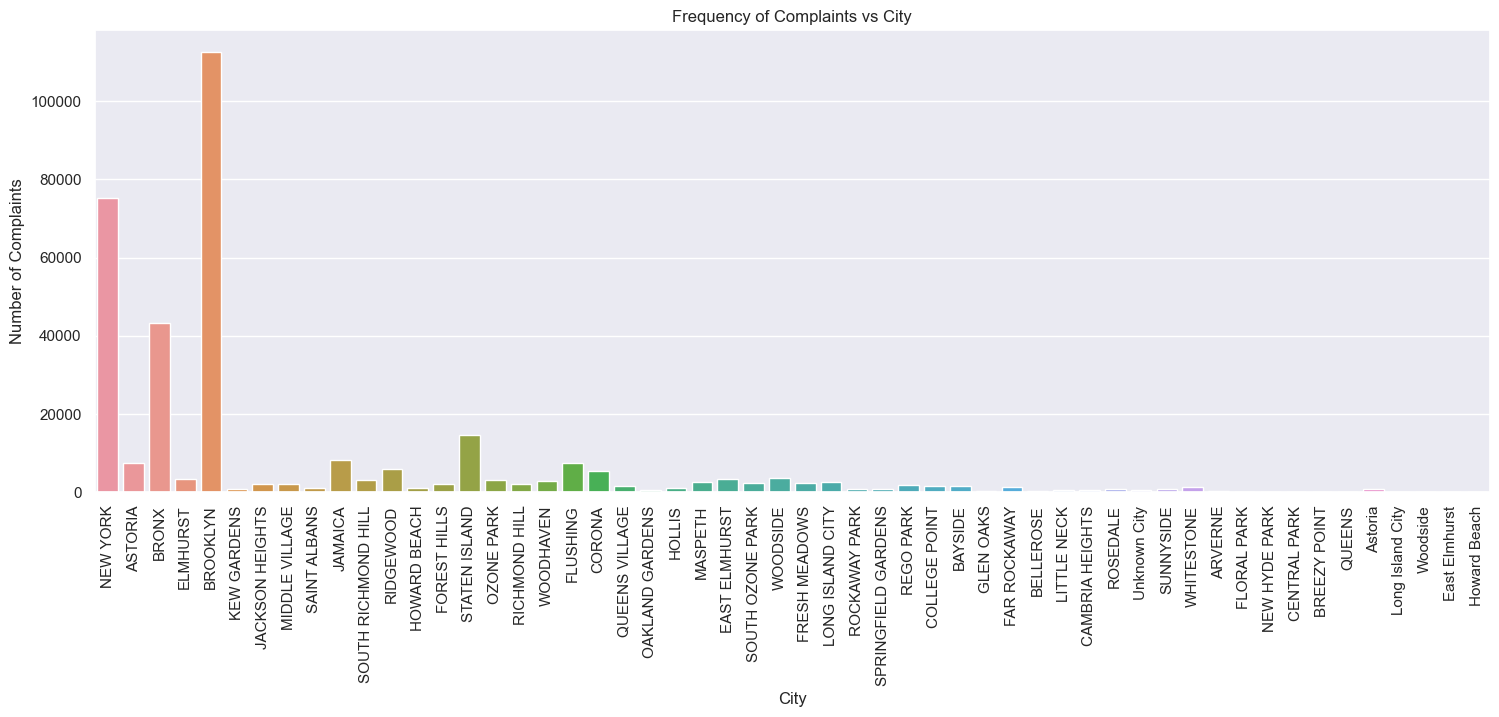

In [93]:
sns.set(rc={'figure.figsize':(18,6)})
sns.countplot(x='City', data=df)
plt.xticks(rotation=90)
plt.title('Frequency of Complaints vs City')
plt.xlabel('City')
plt.ylabel('Number of Complaints')

The frequency plot of number of complaints in each city shows, the city "Brooklyn" has highest number of complaints

In [115]:
# the datafrane that contains only the brooklyn city data
df_brooklyn = service_req_df[service_req_df['City'] == "BROOKLYN"]
df_brooklyn

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Calculated diff_days,Calculated diff
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)",0 days 01:53:41,6821.0
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)",0 days 01:23:42,5022.0
13,32305074,2015-12-31 23:47:58,2016-01-01 08:18:47,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,...,NaN,NaN,NaN,NaN,NaN,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)",0 days 08:30:49,30649.0
17,32310273,2015-12-31 23:44:52,2016-01-01 00:36:10,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,...,NaN,NaN,NaN,NaN,NaN,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)",0 days 00:51:18,3078.0
18,32306617,2015-12-31 23:40:59,2016-01-01 02:37:28,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)",0 days 02:56:29,10589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364539,29608505,2015-01-01 00:23:55,2015-01-01 02:58:38,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11201.0,229 DUFFIELD STREET,...,NaN,NaN,NaN,NaN,NaN,40.691248,-73.984375,"(40.69124772858873, -73.98437529459297)",0 days 02:34:43,9283.0
364541,29612697,2015-01-01 00:19:22,2015-01-01 02:41:10,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11211.0,27 HOPE STREET,...,NaN,NaN,NaN,NaN,NaN,40.713613,-73.956966,"(40.71361332917013, -73.95696623841229)",0 days 02:21:48,8508.0
364544,29613295,2015-01-01 00:17:48,2015-01-01 03:24:48,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11217.0,242 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.680352,-73.974766,"(40.68035202521423, -73.97476587888686)",0 days 03:07:00,11220.0
364545,29613456,2015-01-01 00:17:47,2015-01-01 00:51:13,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11237.0,1373 DECATUR STREET,...,NaN,NaN,NaN,NaN,NaN,40.692384,-73.904011,"(40.692383519190834, -73.90401080101479)",0 days 00:33:26,2006.0


Text(0, 0.5, 'Number of Complaints')

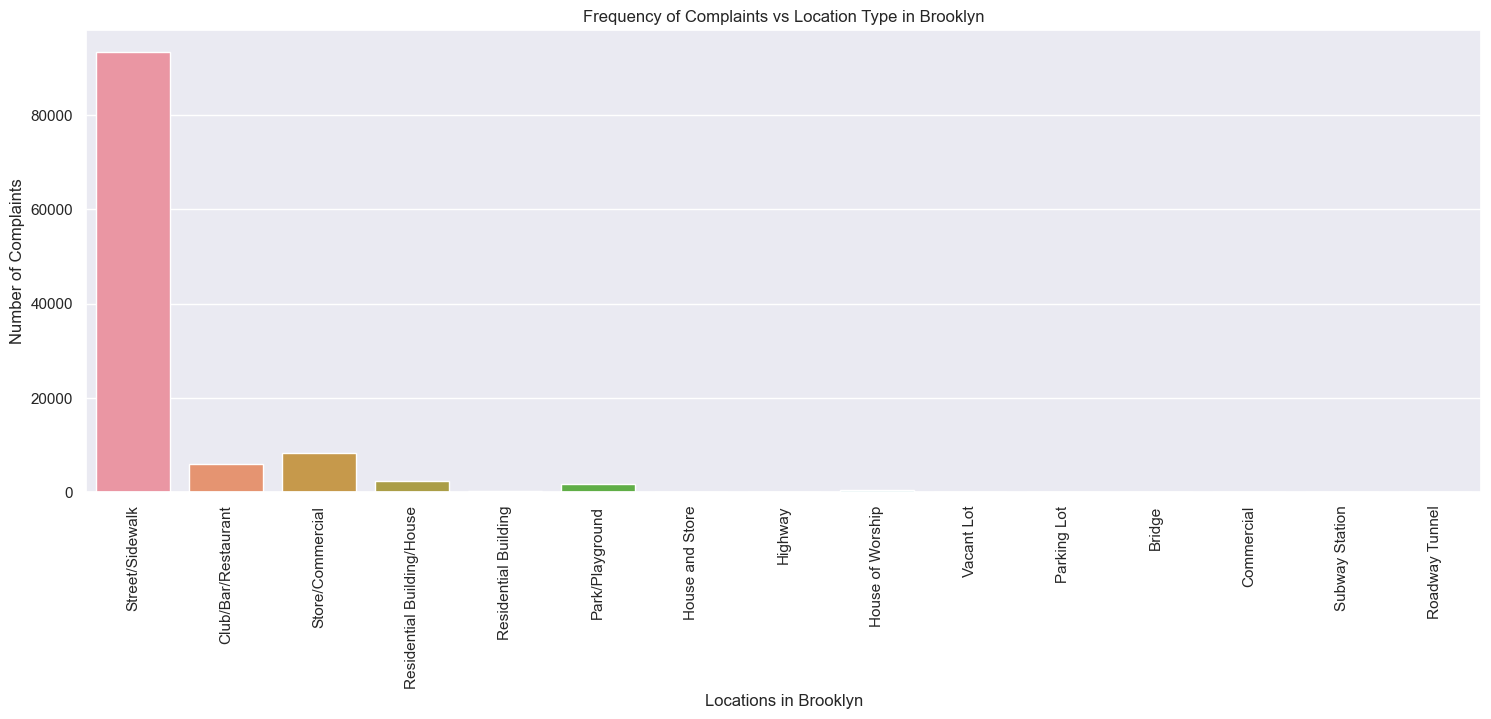

In [117]:
sns.set(rc={'figure.figsize':(18,6)})
sns.countplot(x='Location Type', data=df_brooklyn)
plt.xticks(rotation=90)
plt.title('Frequency of Complaints vs Location Type in Brooklyn')
plt.xlabel('Locations in Brooklyn')
plt.ylabel('Number of Complaints')

**2.3.7 Scatter plot of Concentration of Complaints across Brooklyn**

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

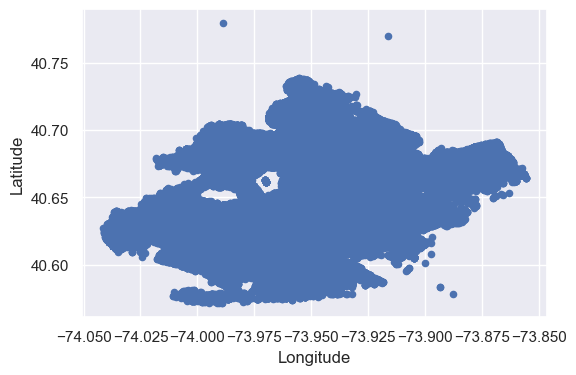

In [135]:
df_brooklyn.plot(x='Longitude', y= 'Latitude', kind = 'scatter', figsize=(6,4))

In [150]:
import matplotlib.cm as cm
df_brooklyn[['Longitude', 'Latitude']].plot(kind = 'hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = "jet", mincnt=1, title = 'Complaints Concentration in Brooklyn', figsize = (10, 8))

import matplotlib
matplotlib.colormaps.get_cmap(obj)

n = 10000
df = pd.DataFrame({'x': np.random.randn(n),
                   'y': np.random.randn(n)})
ax = df.plot.hexbin(x='x', y='y', gridsize=20)

df_brooklyn.plot(x='Longitude', y='Latitude', kind = 'hexbin', figsize=(6,4), colormap="jet", gridsize=40)
df_brooklyn.plot.hexbin(x='Longitude', y='Latitude', gridsize=25, title="Hexagonal binning plot for DataFrame columns")

AttributeError: 'ColormapRegistry' object has no attribute 'get_cmap'

**Scatter plot on concentration of Complaints across Brooklyn**

Text(0.5, 1.0, 'Scatter plot on concentration of Complaints')

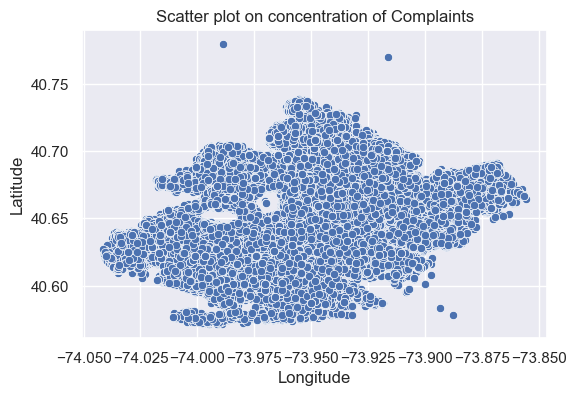

In [178]:
#df_brooklyn.plot(x='Longitude', y= 'Latitude', kind = 'scatter', figsize=(6,4))
sns.set(rc={'figure.figsize':(6,4)})
sns.scatterplot(x=df_brooklyn['Longitude'], y=df_brooklyn['Latitude'])
plt.title('Scatter plot on concentration of Complaints')

**Hexbin plot on concentration of Complaints across Brooklyn**

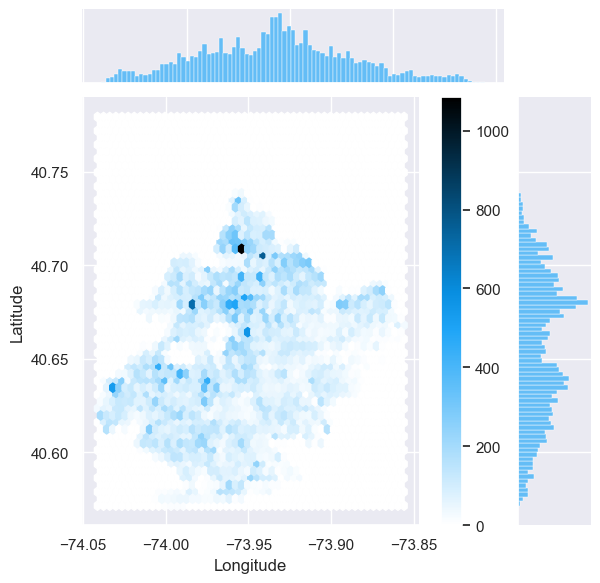

In [198]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set(color_codes=True)#9BAFF8
sns.jointplot(x=df_brooklyn['Longitude'], y=df_brooklyn['Latitude'], kind="hex", color="#37AFF8")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()

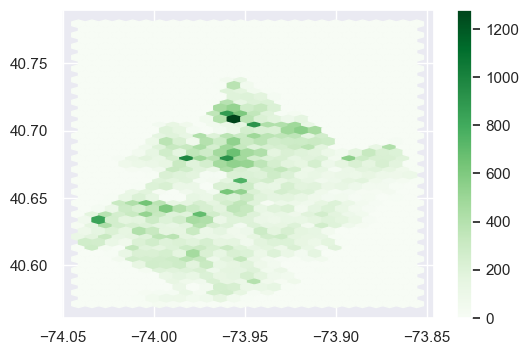

In [203]:
plt.hexbin(x=df_brooklyn['Longitude'], y=df_brooklyn['Latitude'], gridsize=(25,25), cmap=plt.cm.Greens)
plt.colorbar()
plt.show()

### 3 Types of Complaints

**3.1 Bar plot for types of Complaints**

Text(0.5, 1.0, 'Bar plot for Complaint Types')

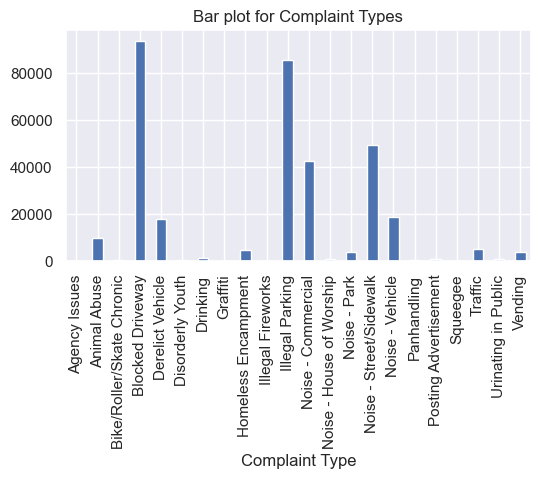

In [213]:
service_req_df.groupby('Complaint Type')['Complaint Type'].count().plot(kind="bar", figsize=(6,3))
plt.title('Bar plot for Complaint Types')

In [217]:
df = service_req_df[service_req_df['City'] == "NEW YORK"].groupby('Complaint Type')['Complaint Type'].agg('count').sort_values(ascending=False)
df

Complaint Type
Noise - Street/Sidewalk      21789
Noise - Commercial           18270
Illegal Parking              14054
Noise - Vehicle               6159
Homeless Encampment           2921
Blocked Driveway              2616
Vending                       2573
Animal Abuse                  1871
Traffic                       1739
Noise - Park                  1211
Derelict Vehicle               655
Drinking                       313
Urinating in Public            258
Bike/Roller/Skate Chronic      250
Noise - House of Worship       221
Panhandling                    199
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               37
Graffiti                        25
Squeegee                         4
Name: Complaint Type, dtype: int64

In [218]:
df.head(10)

Complaint Type
Noise - Street/Sidewalk    21789
Noise - Commercial         18270
Illegal Parking            14054
Noise - Vehicle             6159
Homeless Encampment         2921
Blocked Driveway            2616
Vending                     2573
Animal Abuse                1871
Traffic                     1739
Noise - Park                1211
Name: Complaint Type, dtype: int64

In [118]:
# new dataframe is created with location type and count from the brooklyn datasets
df2 = df_brooklyn.groupby('Location Type')['Location Type'].agg('count').reset_index(name='Number of Complaints')
df2

,Location Type,Number of Complaints
0,Bridge,1
1,Club/Bar/Restaurant,5902
2,Commercial,16
3,Highway,52
4,House and Store,67
5,House of Worship,377
6,Park/Playground,1704
7,Parking Lot,36
8,Residential Building,176
9,Residential Building/House,2446


Text(0.5, 1.0, 'Scatter plot of concentration of complaints across Brooklyn')

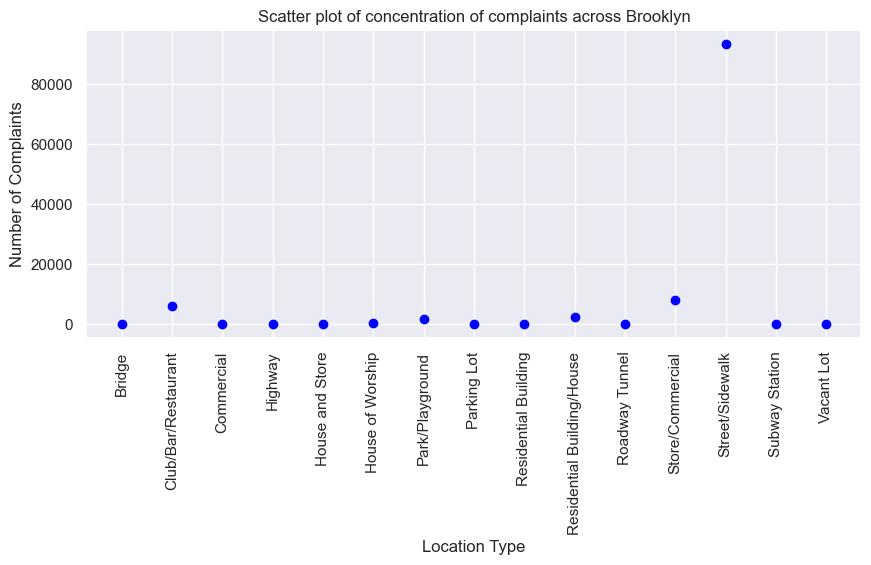

In [125]:
sns.set(rc={'figure.figsize':(10,4)})
plt.scatter(df2['Location Type'], df2['Number of Complaints'], color='blue', label='2Bedrooms')
plt.xticks(rotation=90)
plt.xlabel("Location Type")
plt.ylabel("Number of Complaints")
plt.title('Scatter plot of concentration of complaints across Brooklyn')

In [114]:
df2 = df_brook.groupby('Complaint Type')['Complaint Type'].agg('count').reset_index(name='Number of Complaints')
df2

,Complaint Type,Number of Complaints
0,Animal Abuse,2961
1,Bike/Roller/Skate Chronic,115
2,Blocked Driveway,34145
3,Derelict Vehicle,5497
4,Disorderly Youth,75
5,Drinking,278
6,Graffiti,51
7,Homeless Encampment,857
8,Illegal Fireworks,60
9,Illegal Parking,31575


In [47]:
df_city = service_req_df['City']
df_city

0                 NEW YORK
1                  ASTORIA
2                    BRONX
3                    BRONX
4                 ELMHURST
                ...       
364553           WOODHAVEN
364554               BRONX
364555            NEW YORK
364556               BRONX
364557    SOUTH OZONE PARK
Name: City, Length: 339571, dtype: object

In [46]:
df_city.isna().sum()

0

In [43]:
df_city[df_city == "NEW YORK"]

0         NEW YORK
6         NEW YORK
19        NEW YORK
23        NEW YORK
26        NEW YORK
            ...   
364542    NEW YORK
364543    NEW YORK
364547    NEW YORK
364552    NEW YORK
364555    NEW YORK
Name: City, Length: 75295, dtype: object

In [44]:
df_city.replace(to_replace = np.nan, value ="Unknown City", inplace=True)

In [45]:
df_city[df_city == "Unknown City"]

1421      Unknown City
2131      Unknown City
2166      Unknown City
3332      Unknown City
9163      Unknown City
              ...     
361032    Unknown City
361781    Unknown City
361820    Unknown City
361851    Unknown City
364053    Unknown City
Name: City, Length: 493, dtype: object

In [128]:
min_mean_std = np.mean(service_req_df['Calculated diff']) - np.std(service_req_df['Calculated diff'])
max_mean_std = np.mean(service_req_df['Calculated diff']) + np.std(service_req_df['Calculated diff'])
print(min_mean_std)
print(max_mean_std)

-5989.218754128347
36215.81801912861


In [129]:
service_req_df[service_req_df['Calculated diff'] < min_mean_std]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Calculated diff


In [133]:
service_req_df[service_req_df['Calculated diff'] > max_mean_std]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Calculated diff,Calculated diff_days
11,32306260,2015-12-31 23:50:57,2016-01-01 10:58:08,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453.0,1770 UNDERCLIFF AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.851555,-73.919997,"(40.85155492779258, -73.91999651358469)",40031.0,0 days 11:07:11
14,32309424,2015-12-31 23:47:37,2016-01-01 10:17:22,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,11379.0,62-13 62 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.714093,-73.899384,"(40.71409341858147, -73.89938394187791)",37785.0,0 days 10:29:45
15,32309853,2015-12-31 23:47:30,2016-01-01 15:20:57,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11374.0,61-34 AUSTIN STREET,...,NaN,NaN,NaN,NaN,NaN,40.729679,-73.870417,"(40.72967940444622, -73.87041654016662)",56007.0,0 days 15:33:27
24,32308423,2015-12-31 23:31:40,2016-01-03 16:22:52,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10467.0,3025 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870063,-73.864322,"(40.87006255915965, -73.86432172842636)",233472.0,2 days 16:51:12
33,32306700,2015-12-31 23:18:10,2016-01-02 01:04:03,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,NaN,25-0-25-54 12TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92753.0,1 days 01:45:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364481,29610587,2015-01-01 01:45:18,2015-01-01 17:55:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11427.0,88-09 208 STREET,...,NaN,NaN,NaN,NaN,NaN,40.721774,-73.757722,"(40.721773660734996, -73.7577220654471)",58185.0,0 days 16:09:45
364492,29613458,2015-01-01 01:22:53,2015-01-01 12:22:03,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11377.0,54-20 ROOSEVELT AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.744803,-73.910258,"(40.74480251601369, -73.91025803292698)",39550.0,0 days 10:59:10
364511,29610588,2015-01-01 01:01:10,2015-01-01 16:21:05,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10465.0,2471 ROHR PLACE,...,NaN,NaN,NaN,NaN,NaN,40.821745,-73.837199,"(40.821745275410386, -73.83719948450907)",55195.0,0 days 15:19:55
364517,29610589,2015-01-01 00:57:46,2015-01-01 17:54:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11413.0,134-11 228 STREET,...,NaN,NaN,NaN,NaN,NaN,40.676355,-73.742381,"(40.67635544499855, -73.74238114833844)",60974.0,0 days 16:56:14


In [55]:
service_req_df["Closed Date"].replace(to_replace = np.nan, value =-99999, inplace=True)
df1.isnull().sum()

0

In [71]:
service_req_df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [89]:
df_date = pd.to_datetime(service_req_df["Closed Date"])
df_date.head(417)

0     2016-01-01 00:55:15
1     2016-01-01 01:26:57
2     2016-01-01 04:51:03
3     2016-01-01 07:43:13
4     2016-01-01 03:24:42
              ...        
412   2015-12-31 15:40:36
413   2015-12-31 17:05:56
414   2015-12-31 14:43:47
415   2015-12-31 15:40:37
416                   NaT
Name: Closed Date, Length: 417, dtype: datetime64[ns]

In [93]:
df = service_req_df[service_req_df["Closed Date"].notnull()]
df.head(417)
df.shape

(362177, 53)